# Preprocessing Tutorial  
This tutorial focuses on how to utilize dynamo to preprocess data. In the new version, we make `Preprocessor` class to allow you to freely explore different preprocessing recipes whose step parameters that can be configured inside `Preprocessor`. Existing recipes in preprocessor includes monocle, pearson residual, seurat and sctransform. Moreover, you can replace each preprocessing step with your own implementation with ease. For instance, `Preprocessor`'s monocle pipeline contains `filter_cells_by_outliers`, `filter_genes_by_outliers`, `normalize_by_cells`, `select_genes` and other steps. You can replace the implementation and default monocle parameters passed in to these functions by replacing or changing attributes of `Preprocessor`.

In older versions, dynamo offer several recipes, among which `recipe_monocle` is  a basic function as a building block of other recipes. You can still use these functions to preprocess data.  

`Preprocessor` provides users with `config_monocle_recipe` and other `config_*_recipes` methods to help you reproduce different preprocessor results and integrate with your newly developed preprocessing algorithms.

Import packages

In [2]:
import dynamo as dyn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from dynamo.configuration import DKM
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.dtype size changed")


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


## Glossary of keys generated during preprocessing


- `adata.obs.pass_basic_filter`: a list of boolean variables indicating whether cells pass certain basic filters. In monocle recipe, the basic filtering is based on thresholding of expression values.
- `adata.var.pass_basic_filter`: a list of boolean variables indicating whether genes pass certain basic filters. In monocle recipe, the basic filtering is based on thresholding of expression values.
- `adata.var.use_for_pca`: a list of boolean variables used during PCA dimension reduction and following downstream analysis. In many recipes, this key is equivalent to highly variable genes.
- `adata.var.highly_variable_scores`: a list of float number scores indicating how variable each gene is, typically generated during gene feature selection (`preprocessor.select_genes`). Note only part of recipes do not have this highly variable scores. E.g. `seuratV3` recipe implemented in dynamo does not have highly variable scores due to its thresholding nature. 
- `adata.layers.X_spliced`: unspliced expression matrix after normalization used in downstream computation
- `adata.layers.X_unspliced`: spliced expression matrix after normalization used in downstream computation
- `adata.obsm.X_pca`: normalized X after PCA transformation
  

In [20]:
celltype_key = "Cell_type"
figsize = (10, 10)
dyn.tl.reduceDimension(adata, basis="pca")


|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.0010s]


|-----------> plotting with basis key=X_umap
|-----------> skip filtering Cell_type by stack threshold when stacking color because it is not a numeric type


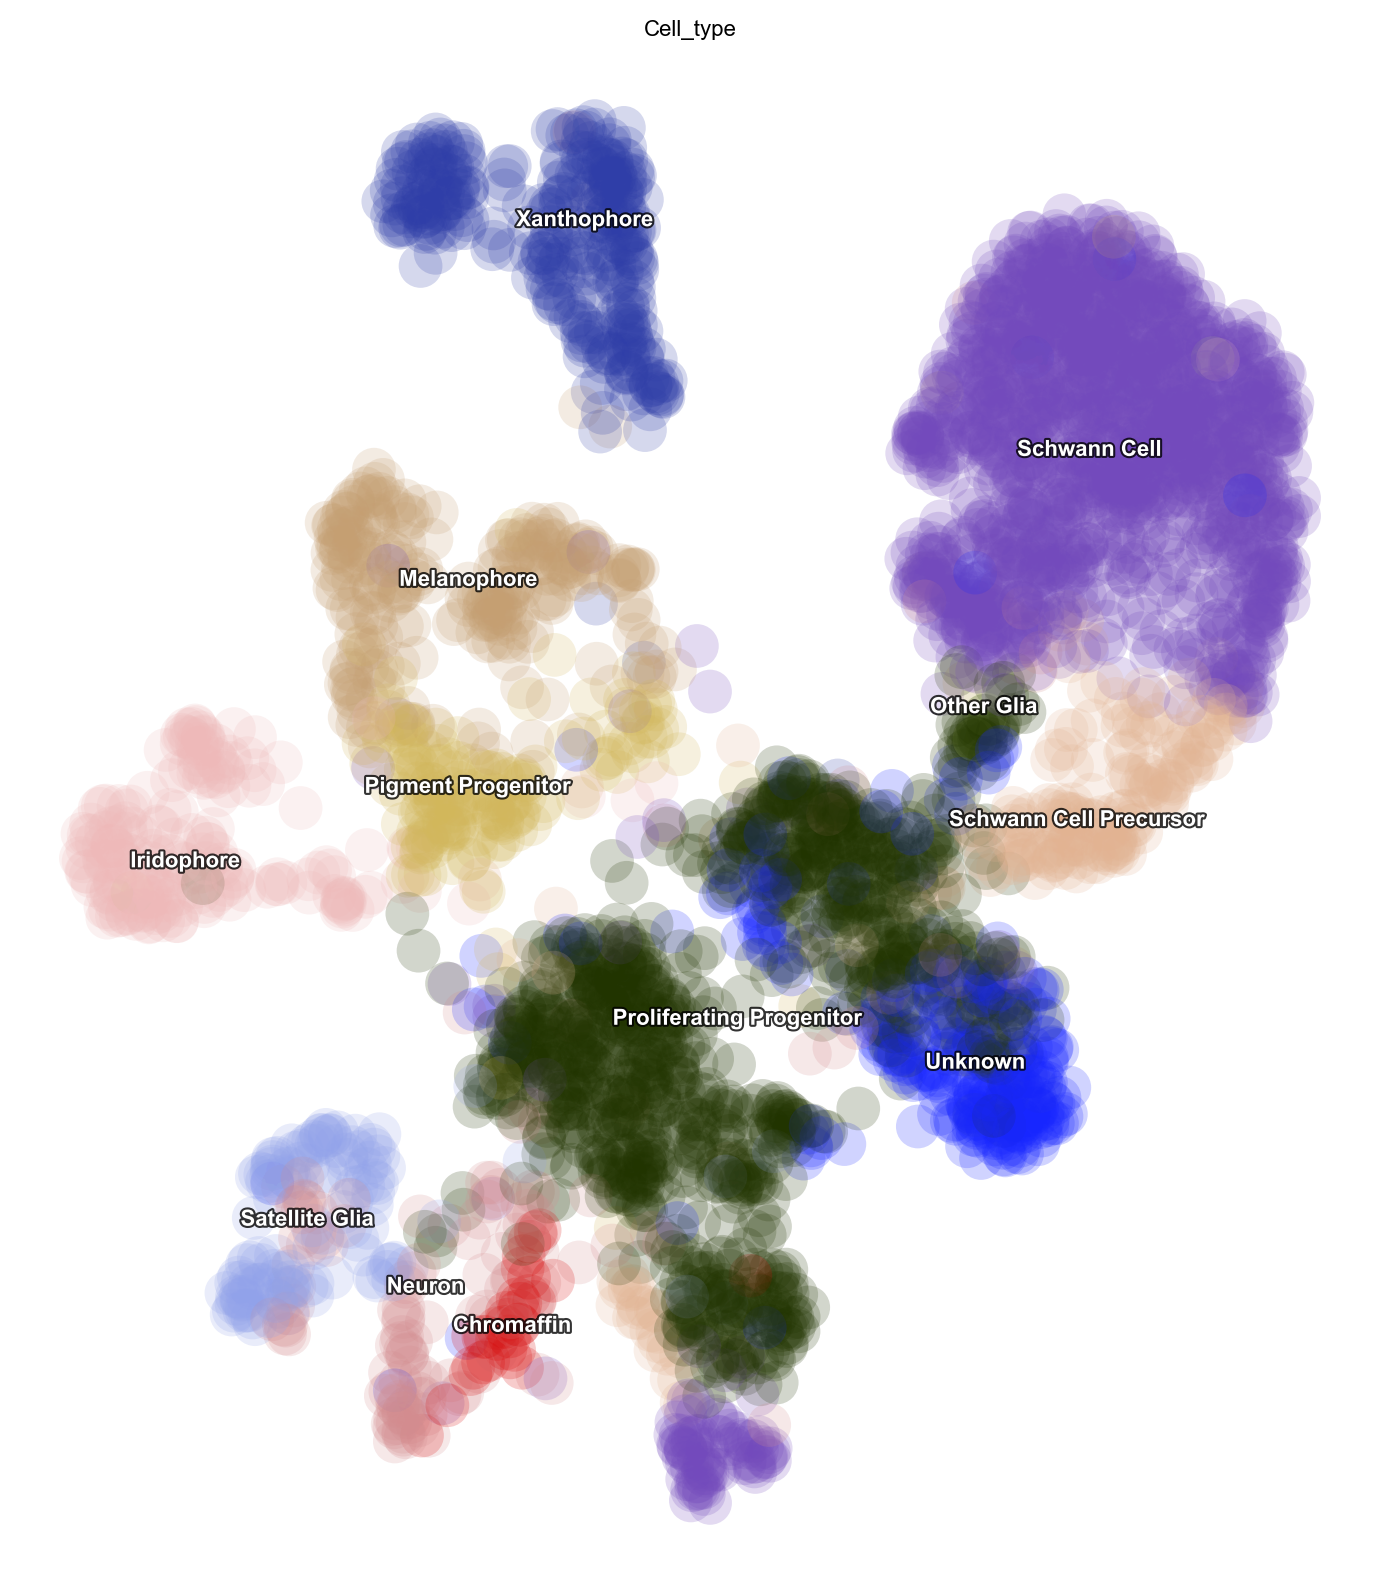

In [33]:
dyn.pl.scatters(adata, basis="umap", color=celltype_key, figsize=figsize, frontier=False, alpha=0.2)

## Using Predefined (default) Recipe Configurations in Preprocessor

Read zebrafish data

In [3]:
adata = dyn.sample_data.zebrafish()
celltype_key = "Cell_type"
figsize = (10, 10)

|-----> Downloading data to ./data/zebrafish.h5ad


Import `Preprocessor` class

In [4]:
from dynamo.preprocessing import Preprocessor

`dynamo` provides users with `preprocess_adata`, a simple wrapper, to apply preprocess steps with default settings. In this section, we will go through recipes in `preprocess_adata` and observe how preprocess methods can influence visualization results. 


### Applying Monocle Recipe 

**TODO: remake the flowchart**
![monocle-flowchart](./images/normalization-monocle-dynamo-flow-chart.png)

In [9]:
preprocessor = Preprocessor()
preprocessor.preprocess_adata(adata, recipe="monocle")

# Alternative
# preprocessor.config_monocle_recipe(adata)
# preprocessor.preprocess_adata_monocle(adata)

default_preprocessor_monocle_adata = adata # save for usage later

|-----> Running preprocessing pipeline...
|-----------> <insert> {'norm_method': None} to uns['pp'] in AnnData Object.
|-----------> <insert> tkey=None to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type=None to uns['pp'] in AnnData Object.
|-----> making adata observation index unique...
|-----> applying collapse species adata...
|-----> applying convert_gene_name function...
|-----> making adata observation index unique after gene name conversion...
|-----> filtering outlier cells...
|-----> cell filter kwargs:{'filter_bool': None, 'layer': 'all', 'min_expr_genes_s': 50, 'min_expr_genes_u': 25, 'min_expr_genes_p': 2, 'max_expr_genes_s': inf, 'max_expr_genes_u': inf, 'max_expr_genes_p': inf, 'shared_count': None}
|-----------> filtering cells by layer:X
|-----------> filtering cells by layer:spliced
|-----------> filtering cells by layer:unspliced
|-----> skip filtering by layer:protein as it is not in adata.
|-----> <insert> pass_basic_filter to obs in AnnData Obje

|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [24.3460s]
|-----------> plotting with basis key=X_umap
|-----------> skip filtering Cell_type by stack threshold when stacking color because it is not a numeric type


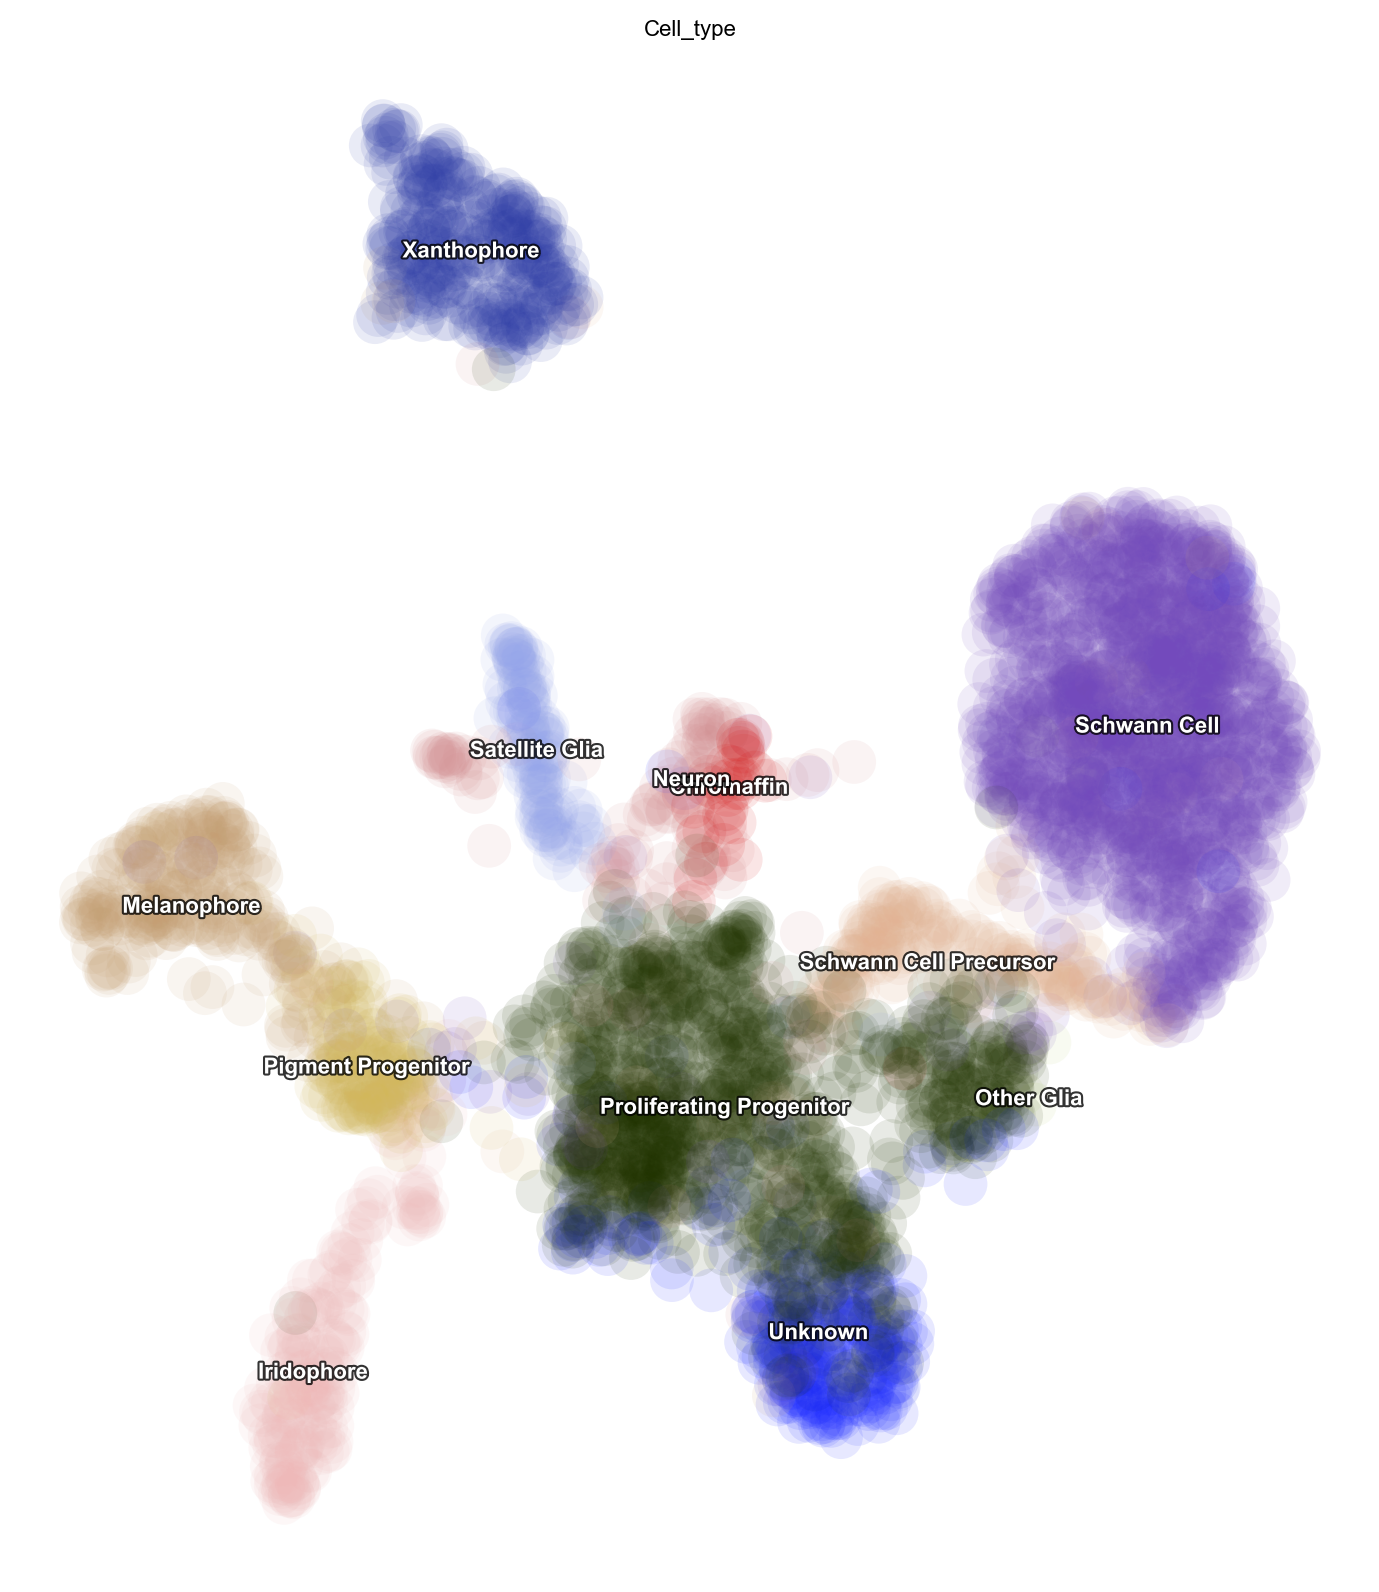

In [6]:
dyn.tl.reduceDimension(adata, basis="pca")
dyn.pl.umap(adata, color=celltype_key, figsize=figsize)

### Applying Pearson Residuals Recipe

In [7]:
adata = dyn.sample_data.zebrafish()
preprocessor = Preprocessor()
# preprocessor.config_pearson_residuals_recipe(adata)
# preprocessor.preprocess_adata_pearson_residuals(adata)
preprocessor.preprocess_adata(adata, recipe="pearson_residuals")

|-----> Downloading data to ./data/zebrafish.h5ad
|-----------> <insert> {'norm_method': None} to uns['pp'] in AnnData Object.
|-----------> <insert> tkey=None to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type=None to uns['pp'] in AnnData Object.
|-----> making adata observation index unique...
|-----> applying collapse species adata...
|-----> applying convert_gene_name function...
|-----> making adata observation index unique after gene name conversion...
|-----> selecting genes...
|-----> select_genes kwargs:{'n_top_genes': 2000}
|-----> gene selection on layer: X
|-----> extracting highly variable genes
|-----> normalizing selected genes...
|-----> applying Pearson residuals to layer <spliced>
|-----> replacing layer <spliced> with pearson residual normalized data.


KeyboardInterrupt: 

In [ ]:
dyn.tl.reduceDimension(adata)
dyn.pl.umap(adata, color=celltype_key, figsize=figsize)

### Applying Sctransform Recipe

In [ ]:
adata = dyn.sample_data.zebrafish()
preprocessor = Preprocessor()
# preprocessor.config_sctransform_recipe(adata)
# preprocessor.preprocess_adata_sctransform(adata)
preprocessor.preprocess_adata(adata, recipe="sctransform")

In [ ]:
dyn.tl.reduceDimension(adata)
dyn.pl.umap(adata, color=celltype_key, figsize=figsize)

### Applying Seurat Recipe

In [ ]:
adata = dyn.sample_data.zebrafish()
preprocessor = Preprocessor()
# preprocessor.config_seurat_recipe()
# preprocessor.preprocess_adata_seurat(adata)
preprocessor.preprocess_adata(adata, recipe="seurat")

In [ ]:
dyn.tl.reduceDimension(adata)
dyn.pl.umap(adata, color=celltype_key, figsize=figsize)

## Customize Function Parameters Configured in Preprocessor
Here we are gong to use recipe monocle as an example. In recipe monocle's selection genes function, we can set recipe to be `dynamo_monocle`, `seurat`, `svr` and others to apply different criterions to select genes. We can set preprocesor's `select_genes_kwargs` to pass wanted parameters. In the example below, the default parameter is `recipe=dynmoa_monocle`. We can change it to `seurat` and add other contraint parameters as well.

Let's call `preprocessor.config_monocle_recipe` to set `monocle` recipe preprocessing steps and corresponding function parameters. The default constructor parameters of `Preprocessor` for preprocessing are from our monocle recipe used in `dynamo` papers.

In [ ]:
adata = dyn.sample_data.zebrafish()
preprocessor = Preprocessor()
preprocessor.config_monocle_recipe(adata)

`preprocessor.select_genes_kwargs` contains arguments that will be passed to `select_genes` step.

In [ ]:
preprocessor.select_genes_kwargs

In [ ]:
preprocessor.select_genes_kwargs = dict(
    recipe="seurat",
    seurat_min_disp=None,
    seurat_max_disp=None,
    seurat_min_mean=0.4,
    seurat_max_mean=0.6,
)
preprocessor.select_genes_kwargs


In [ ]:
preprocessor.preprocess_adata_monocle(adata);
dyn.tl.reduceDimension(adata, basis="pca")
dyn.pl.umap(adata, color=celltype_key, figsize=figsize)

## Define customized preprocessor steps and integrate with existing preprocessor